### 1. Data Statistika

In [4]:
import pandas as pd
import scipy.stats as st
from IPython.display import display, Markdown, Latex
data = pd.read_csv('Gandum.csv')

In [5]:
display(Markdown("__Beberapa data statistik:__"))
df = data[data.columns[1:11]]
stats = df.describe().loc[['mean']]
stats.loc['med'] = df.describe().loc['50%'].tolist()
#stats.loc['mode'] = df.mode()[:1].max().tolist()
stats.loc['std'] = df.std().tolist()
stats.loc['var'] = df.var().tolist()
stats.loc['range'] = (df.max() - df.min()).tolist()
stats = stats.append(df.describe().loc[['min','max','25%','50%','75%']])
stats.loc['iqr'] = (stats.loc['75%'] - stats.loc['25%']).tolist()
stats.loc['skew'] = df.skew().tolist()
stats.loc['kurt'] = df.kurtosis().tolist()
print(stats)


__Beberapa data statistik:__

              Daerah  SumbuUtama  SumbuKecil  Keunikan   AreaBulatan  \
mean     4801.246000  116.045171   53.715246  0.878764  4.937048e+03   
med      4735.000000  115.405140   53.731199  0.890045  4.857000e+03   
std       986.395491   18.282626    4.071075  0.036586  1.011696e+03   
var    972976.065615  334.254412   16.573650  0.001339  1.023529e+06   
range    4931.000000  153.795469   29.071182  0.194085  5.141000e+03   
min      2522.000000   74.133114   39.906517  0.719916  2.579000e+03   
max      7453.000000  227.928583   68.977700  0.914001  7.720000e+03   
25%      4042.750000  104.116098   51.193576  0.863676  4.170250e+03   
50%      4735.000000  115.405140   53.731199  0.890045  4.857000e+03   
75%      5495.500000  129.046792   56.325158  0.907578  5.654250e+03   
iqr      1452.750000   24.930694    5.131582  0.043902  1.484000e+03   
skew        0.238144    0.761529   -0.010828 -1.623472  2.575600e-01   
kurt       -0.434631    4.330534    0.475568  2.917256 -4.096849

__Legenda:__ <br>
mean	: mean <br>
med	    : median<br>
std	    : standar deviasi<br>
var	    : variansi<br>
range	: range<br>
min	: nilai minimum<br>
max	: nilai maksimum<br>
25%	: kuartil 1<br>
50%	: kuartil 2<br>
75%	: kuartil 3<br>
iqr	: IQR<br>
skew	: skewness<br>
kurt	: kurtosis<br>

In [6]:
display(Markdown("__Data modus:__ "))
df.mode()

__Data modus:__ 

,Daerah,SumbuUtama,SumbuKecil,Keunikan,AreaBulatan,Diameter,KadarAir,Keliling,Bulatan,Ransum
0,3992.0,74.133114,39.906517,0.719916,3802.0,71.293564,0.735849,197.015,0.174590,1.440796
1,4881.0,74.364021,41.436419,0.725553,4913.0,78.833256,0.824405,200.587,0.261297,1.453137
2,5642.0,74.691881,42.871879,0.731211,NaN,84.756224,NaN,202.456,0.299298,1.465950
3,6083.0,76.293164,43.284979,0.738639,NaN,88.006342,NaN,207.325,0.589146,1.483456
4,NaN,76.789043,44.119355,0.749282,NaN,NaN,NaN,207.697,0.603807,1.510000
...,...,...,...,...,...,...,...,...,...,...
495,NaN,152.068440,63.322854,0.913724,NaN,NaN,NaN,375.651,0.872417,2.461017
496,NaN,152.113491,63.762307,0.913760,NaN,NaN,NaN,390.125,0.874243,2.461510
497,NaN,153.583387,64.012769,0.913891,NaN,NaN,NaN,434.235,0.874743,2.463297
498,NaN,227.105462,65.738475,0.913909,NaN,NaN,NaN,448.305,0.891706,2.463546


### 4. Tes Hipotesis 1 Sampel

In [316]:
def countZ(kol,mu):
    #menampilkan nilai x̄̅, σ, n, dan juga hasil perhitungan z 
    mean = data[kol].mean()
    print("x̄̅ = " + str(mean))
    std = data[kol].std()
    print("σ = " + str(std))
    count = data[kol].count()
    print("n = " + str(count))
    z = (mean-mu)/(std/(count**0.5)) 
    print("Maka, z = " + str(z) + ".")
    return z

def countPV(z,opr):
    #menghitung nilai p-value sesuai dengan nilai z dan operatornya
    if opr==">":
        pvalue = 1-st.norm.cdf(z)
        print("p-value = P(z > " + str(z) + ") = " + str(pvalue))
    elif opr=="!=":
            if z>0:
                pvalue = 2*(1-st.norm.cdf(z))
                print("p-value = 2P(z > " + str(z) + ") = " + str(pvalue))
            else: #z<=0
                pvalue = 2*st.norm.cdf(z)
                print("p-value = 2P(z < " + str(z) + ") = " + str(pvalue))
        
    elif opr=="<":
        pvalue = st.norm.cdf(z)
        print("p-value = P(z < " + str(z) + ") = " + str(pvalue))
    return pvalue

def cekZ(z):
    #mengecek apakah z berada di daerah kritis dan menghasilkan keputusan
    if z>cpoint:       
        display(Markdown("Karena z berada di daerah kritis, maka __$H_{0}$ ditolak.__"))
    else:
        display(Markdown("Karena z tidak berada pada daerah kritis, maka __$H_{0}$ diterima.__"))
            
            
            
def cekP(p,alpha):
    #mengecek apakah p-value lebih kecil dari α dan menghasilkan keputusan
    if p<alpha:
        display(Markdown("Karena p-value < α, maka __$H_{0}$ ditolak.__"))
    else:
        display(Markdown("Karena p-value >= α, maka __$H_{0}$ diterima.__"))

#### 4.a. Pengujian Terhadap $μ_{Daerah} > 4700$

<AxesSubplot:>

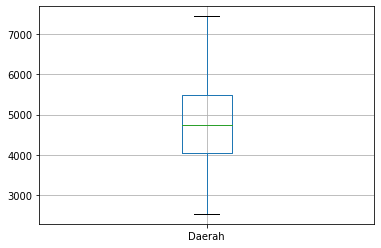

In [317]:
data.boxplot(["Daerah"])

__Langkah Pengujian__ <br>
1. Hipotesis nol $H_{0}: μ_{Daerah} = 4700$ <br> 
2. Hipotesis alternatif $H_{1}: μ_{Daerah} > 4700$ <br> 
3. Tingkat signifikan $α = 0.05$
4. Uji Statistik dan Daerah Kritis<br>
Uji statistik menggunakan rumus pencarian nilai z sebagai berikut. <br>
$\;\;\;\;\;\;z= \Large\frac{\bar{x}-\mu}{\frac{\sigma}{\sqrt n}}$ <br>

In [318]:
alpha = 0.05
cpoint = st.norm.ppf(1-alpha) #titik kritis
display(Markdown("Derah kritis terletak pada z > " + str (cpoint) + "."))

Derah kritis terletak pada z > 1.6448536269514722.

In [319]:
display(Markdown("5. Menghitung Nilai Uji Statistik z dan p-value"))
zdaerah = countZ("Daerah",4700)
pvalue = countPV(zdaerah,">")

5. Menghitung Nilai Uji Statistik z dan p-value

x̄̅ = 4801.246
σ = 986.3954914816017
n = 500
Maka, z = 2.2951538242525173.
p-value = P(z > 2.2951538242525173) = 0.010862155196799894


In [320]:
display(Markdown("6. Keputusan"))
cekZ(zdaerah)
cekP(pvalue,alpha)

6. Keputusan

Karena z berada di daerah kritis, maka __$H_{0}$ ditolak.__

Karena p-value < α, maka __$H_{0}$ ditolak.__

Kesimpulan: $μ_{Daerah} > 4700$

 #### 4.b. Pengujian Terhadap $μ_{SumbuUtama} ≠ 116$

<AxesSubplot:>

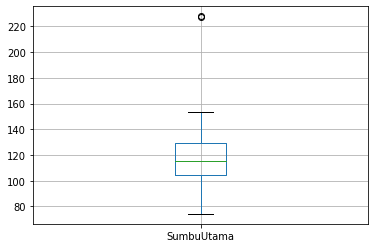

In [321]:
data.boxplot(["SumbuUtama"])

__Langkah Pengujian__ <br>
1. Hipotesis nol $H_{0}: μ_{SumbuUtama} = 116$ <br> 
2. Hipotesis alternatif $H_{1}: μ_{SumbuUtama} ≠ 116$ <br> 
3. Tingkat signifikan $α = 0.05$
4. Uji Statistik dan Daerah Kritis<br>
Uji statistik menggunakan rumus pencarian nilai z sebagai berikut. <br>
$\;\;\;\;\;\;z= \Large\frac{\bar{x}-\mu}{\frac{\sigma}{\sqrt n}}$ <br>

In [322]:
alpha = 0.05
cpoint = st.norm.ppf(1-alpha) #titik kritis
display(Markdown("Derah kritis terletak pada z > " + str (cpoint) + "."))

Derah kritis terletak pada z > 1.6448536269514722.

In [323]:
display(Markdown("5. Menghitung Nilai Uji Statistik z dan p-value"))
zSumbuUtama = countZ("SumbuUtama",116)
pvalue = countPV(zSumbuUtama,"!=")

5. Menghitung Nilai Uji Statistik z dan p-value

x̄̅ = 116.04517136778
σ = 18.28262595755935
n = 500
Maka, z = 0.05524712326730106.
p-value = 2P(z > 0.05524712326730106) = 0.9559415872977521


In [324]:
display(Markdown("6. Keputusan"))
cekZ(zSumbuUtama)
cekP(pvalue,alpha)

6. Keputusan

Karena z tidak berada pada daerah kritis, maka __$H_{0}$ diterima.__

Karena p-value >= α, maka __$H_{0}$ diterima.__

Kesimpulan: $μ_{SumbuUtama} = 116$

 #### 4.c. Pengujian Terhadap $μ_{SumbuKecil} ≠ 50$ untuk 20 baris pertama

<AxesSubplot:>

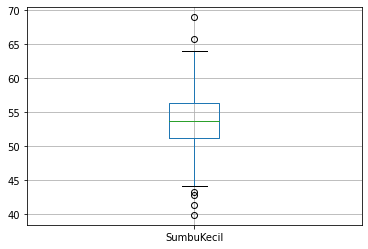

In [325]:
data.boxplot(["SumbuKecil"][:20])

__Langkah Pengujian__ <br>
1. Hipotesis nol $H_{0}: μ_{SumbuKecil[:20]} = 50$ <br> 
2. Hipotesis alternatif $H_{1}: μ_{SumbuKecil[:20]} ≠ 50$ <br> 
3. Tingkat signifikan $α = 0.05$
4. Uji Statistik dan Daerah Kritis<br>
Uji statistik menggunakan rumus pencarian nilai z sebagai berikut. <br>
$\;\;\;\;\;\;z= \Large\frac{\bar{x}-\mu}{\frac{\sigma}{\sqrt n}}$ <br>

In [326]:
alpha = 0.05
cpoint = st.norm.ppf(1-alpha) #titik kritis
display(Markdown("Derah kritis terletak pada z > " + str (cpoint) + "."))

Derah kritis terletak pada z > 1.6448536269514722.

In [327]:
display(Markdown("5. Menghitung Nilai Uji Statistik z dan p-value"))
mu = 50
mean = data["SumbuKecil"][:20].mean()
print("x̄̅ = " + str(mean))
std = data["SumbuKecil"][:20].std()
print("σ = " + str(std))
count = data["SumbuKecil"][:20].count()
print("n = " + str(count))
zSumbuKecil = (mean-mu)/(std/(count**0.5)) 
print("Maka, z = " + str(zSumbuKecil) + ".")
pvalue = countPV(zSumbuKecil,"!=")

5. Menghitung Nilai Uji Statistik z dan p-value

x̄̅ = 54.8872762605
σ = 3.3738798982760296
n = 20
Maka, z = 6.478168916968894.
p-value = 2P(z > 6.478168916968894) = 9.284240043427872e-11


In [328]:
display(Markdown("6. Keputusan"))
cekZ(zSumbuKecil)
cekP(pvalue,alpha)

6. Keputusan

Karena z berada di daerah kritis, maka __$H_{0}$ ditolak.__

Karena p-value < α, maka __$H_{0}$ ditolak.__

Kesimpulan: $μ_{SumbuKecil[:20]} ≠ 50$ 

In [329]:
def countZ2(kol,x,p0,opr):
    #menghitung nilai z berdasarkan data statistik dan proporsi nilai
    if opr == "<":
        filter = data[data[kol]<x]
        count = filter[kol].count()
        print("Banyaknya data " + str(kol) + " > " + str(x) + " adalah " + str(count) + ".")
    elif opr == ">":
        filter = data[data[kol]>x]
        count = filter[kol].count()
        print("Banyaknya data " + str(kol) + " > " + str(x) + " adalah " + str(count) + ".")
    print("Banyaknya seluruh data adalah " + str(data[kol].count()) + ".")
    p = count/data[kol].count()
    print("Maka, p̂ = " + str(p) + ".")
    print("po = " + str(p0))
    n = data[kol].count()
    print("n = " + str(n))
    z = (p-p0)/(p0*(1-p0)/n)**0.5
    print("Maka, z = " + str(z) + ".")
    return z
    

 #### 4.d. Pengujian Terhadap $P(Diameter > 85) ≠ 15\%$

<AxesSubplot:>

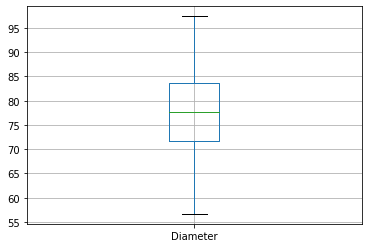

In [330]:
data.boxplot(["Diameter"])

__Langkah Pengujian__ <br>
1. Hipotesis nol $H_{0}: P(Diameter > 85) = 15\%$ <br> 
2. Hipotesis alternatif $H_{1}: P(Diameter > 85) ≠ 15\%$ <br> 
3. Tingkat signifikan $α = 0.05$
4. Uji Statistik dan Daerah Kritis<br>
Uji statistik menggunakan rumus pencarian nilai z sebagai berikut. <br>
$\;\;\;\;\;\;z = \Large\frac{\hat{p} - p_{\normalsize0}}{\sqrt{\frac{p_{\normalsize0}(1 - p_{\normalsize0})}{n}}}$ <br>

In [331]:
alpha = 0.05
cpoint = st.norm.ppf(1-alpha) #titik kritis
display(Markdown("Derah kritis terletak pada z > " + str (cpoint) + "."))

Derah kritis terletak pada z > 1.6448536269514722.

In [332]:
display(Markdown("5. Menghitung Nilai Uji Statistik z dan p-value"))
zDiameter = countZ2("Diameter",85,0.15,">")
pvalue = countPV(zDiameter,"!=")

5. Menghitung Nilai Uji Statistik z dan p-value

Banyaknya data Diameter > 85 adalah 97.
Banyaknya seluruh data adalah 500.
Maka, p̂ = 0.194.
po = 0.15
n = 500
Maka, z = 2.755386880774658.
p-value = 2P(z > 2.755386880774658) = 0.005862277168409591


In [333]:
display(Markdown("6. Keputusan"))
cekZ(zDiameter)
cekP(pvalue,alpha)

6. Keputusan

Karena z berada di daerah kritis, maka __$H_{0}$ ditolak.__

Karena p-value < α, maka __$H_{0}$ ditolak.__

Kesimpulan: $P(Diameter > 85) ≠ 15\%$

 #### 4.e. Pengujian Terhadap $P(Keliling < 100) < 5\%$

<AxesSubplot:>

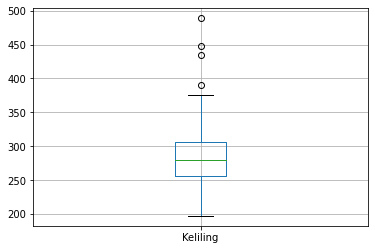

In [334]:
data.boxplot(["Keliling"])

__Langkah Pengujian__ <br>
1. Hipotesis nol $H_{0}: P(Keliling < 100) = 5\%$ <br> 
2. Hipotesis alternatif $H_{1}: P(Keliling < 100) < 5\%$ <br> 
3. Tingkat signifikan $α = 0.05$
4. Uji Statistik dan Daerah Kritis<br>
Uji statistik menggunakan rumus pencarian nilai z sebagai berikut. <br>
$\;\;\;\;\;\;z = \Large\frac{\hat{p} - p_{\normalsize0}}{\sqrt{\frac{p_{\normalsize0}(1 - p_{\normalsize0})}{n}}}$ <br>

In [335]:
alpha = 0.05
cpoint = st.norm.ppf(1-alpha) #titik kritis
display(Markdown("Derah kritis terletak pada z > " + str (cpoint) + "."))

Derah kritis terletak pada z > 1.6448536269514722.

In [336]:
display(Markdown("5. Menghitung Nilai Uji Statistik z dan p-value"))
zKeliling = countZ2("Keliling",100,0.05,"<")
pvalue = countPV(zKeliling,"<")

5. Menghitung Nilai Uji Statistik z dan p-value

Banyaknya data Keliling > 100 adalah 0.
Banyaknya seluruh data adalah 500.
Maka, p̂ = 0.0.
po = 0.05
n = 500
Maka, z = -5.129891760425771.
p-value = P(z < -5.129891760425771) = 1.4495441414387716e-07


In [337]:
display(Markdown("6. Keputusan"))
cekZ(zDiameter)
cekP(pvalue,alpha)

6. Keputusan

Karena z berada di daerah kritis, maka __$H_{0}$ ditolak.__

Karena p-value < α, maka __$H_{0}$ ditolak.__

Kesimpulan: $P(Keliling < 100) < 5\%$

### 6. Tes Korelasi

Apabila nilai korelasi mendekati 0, kedua kolom tidak berkorelasi. <br>
Apabila nilai korelasi mendekati 1, kedua kolom berbanding lurus. <br>
Apabila nilai korelasi mendekati -1, kedua kolom berbanding terbalik. <br>

In [271]:
#DEKLARASI FUNGSI/PROSEDUR YANG DIBUTUHKAN

def scatter(kol1):
    #menampilkan diagram scatterplot dan menunjukkan garis regresi linear antara kolom non-target dengan kolom target
    display(Markdown("Scatterplot " + kol1 + " dengan Kelas"))
    sns.regplot(data[kol1],data['Kelas'])
    
def min3(a,b,c):
    #mengembalikan 0 apabila a minimal, 1 apabila b minimal, 2 apabila c minimal
    if a<b:
        if a<c:
            return 0
        else:
            return 2
    else:
        if b<c:
            return 1
        else:
            return 2
        
def korelasi(kol1):
    #menampilkan nilai korelasi antara kol1 dengan Kelas serta jenis kolerasinya
    kor = data[kol1].corr(data['Kelas'])
    display(Markdown("Nilai korelasi antara " + kol1 + " dengan Kelas adalah = " + str(kor)))
    diff0 = abs(kor)
    diff1 = abs(kor-1)
    diffmin1 = abs(kor+1)
    hsl = min3(diff0,diff1,diffmin1)
    if hsl==0:
        display(Markdown("Maka, keduanya tidak berkolerasi."))
    elif hsl==1:
        display(Markdown("Maka, keduanya memiliki korelasi yang berbanding lurus."))
                
    else: #hsl==2
        display(Markdown("Maka, keduanya memiliki korelasi yang berbanding terbalik."))

#### Korelasi Daerah dengan Kelas 

In [272]:
import seaborn as sns
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

Scatterplot Daerah dengan Kelas

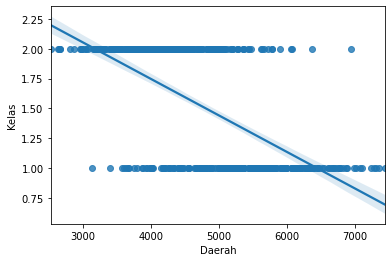

In [273]:
scatter("Daerah")

In [274]:
korelasi("Daerah")

Nilai korelasi antara Daerah dengan Kelas adalah = -0.6027466517416661

Maka, keduanya memiliki korelasi yang berbanding terbalik.

#### Korelasi SumbuUtama dengan Kelas 

Scatterplot SumbuUtama dengan Kelas

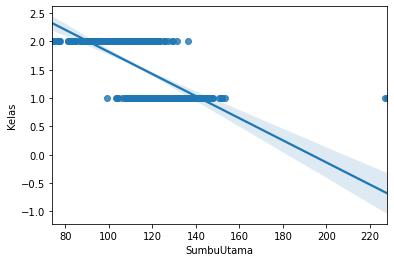

In [275]:
scatter("SumbuUtama")

In [276]:
korelasi("SumbuUtama")

Nilai korelasi antara SumbuUtama dengan Kelas adalah = -0.7130906104204594

Maka, keduanya memiliki korelasi yang berbanding terbalik.

#### Korelasi SumbuKecil dengan Kelas

Scatterplot SumbuKecil dengan Kelas

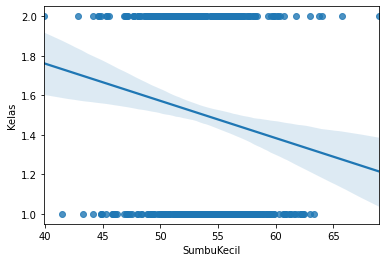

In [277]:
scatter("SumbuKecil")

In [278]:
korelasi("SumbuKecil")

Nilai korelasi antara SumbuKecil dengan Kelas adalah = -0.1529751733553502

Maka, keduanya tidak berkolerasi.

#### Korelasi Keunikan dengan Kelas 

Scatterplot Keunikan dengan Kelas

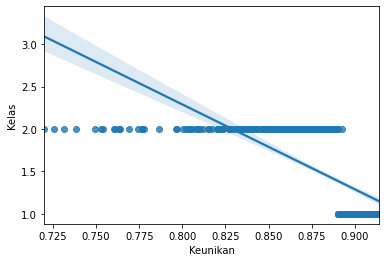

In [279]:
scatter("Keunikan")

In [280]:
korelasi("Keunikan")

Nilai korelasi antara Keunikan dengan Kelas adalah = -0.7304563686511925

Maka, keduanya memiliki korelasi yang berbanding terbalik.

#### Korelasi AreaBulatan dengan Kelas

Scatterplot AreaBulatan dengan Kelas

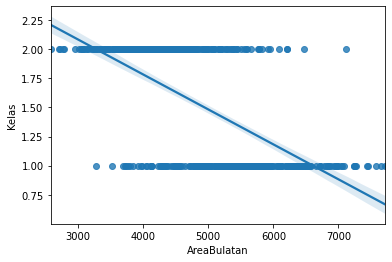

In [281]:
scatter("AreaBulatan")

In [282]:
korelasi("AreaBulatan")

Nilai korelasi antara AreaBulatan dengan Kelas adalah = -0.6073125434153749

Maka, keduanya memiliki korelasi yang berbanding terbalik.

#### Korelasi Diameter dengan Kelas

Scatterplot Diameter dengan Kelas

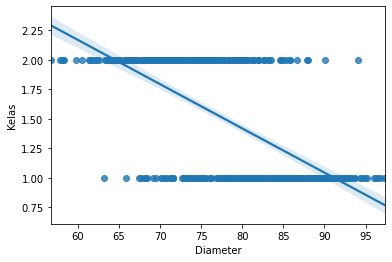

In [283]:
scatter("Diameter")

In [284]:
korelasi("Diameter")

Nilai korelasi antara Diameter dengan Kelas adalah = -0.6025356896618809

Maka, keduanya memiliki korelasi yang berbanding terbalik.

#### Korelasi KadarAir dengan Kelas

Scatterplot KadarAir dengan Kelas

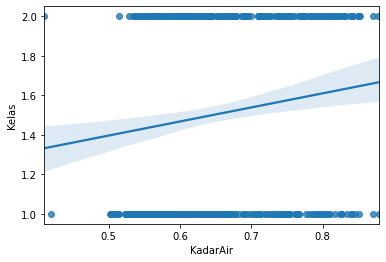

In [285]:
scatter("KadarAir")

In [286]:
korelasi("KadarAir")

Nilai korelasi antara KadarAir dengan Kelas adalah = 0.13434422605727636

Maka, keduanya tidak berkolerasi.

#### Korelasi Keliling dengan Kelas

Scatterplot Keliling dengan Kelas

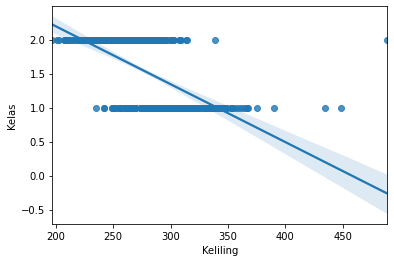

In [287]:
scatter("Keliling")

In [288]:
korelasi("Keliling")

Nilai korelasi antara Keliling dengan Kelas adalah = -0.6348607454756853

Maka, keduanya memiliki korelasi yang berbanding terbalik.

#### Korelasi Bulatan dengan Kelas

Scatterplot Bulatan dengan Kelas

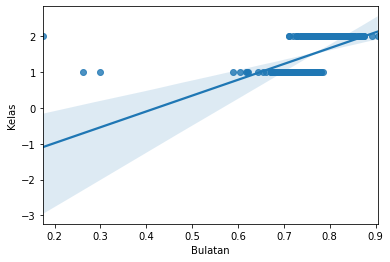

In [289]:
scatter("Bulatan")

In [290]:
korelasi("Bulatan")

Nilai korelasi antara Bulatan dengan Kelas adalah = 0.5450045317240069

Maka, keduanya memiliki korelasi yang berbanding lurus.

#### Korelasi Ransum dengan Kelas

Scatterplot Ransum dengan Kelas

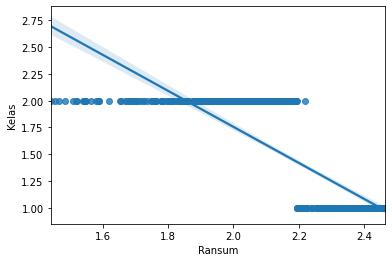

In [291]:
scatter("Ransum")

In [292]:
korelasi("Ransum")

Nilai korelasi antara Ransum dengan Kelas adalah = -0.8399038681287486

Maka, keduanya memiliki korelasi yang berbanding terbalik.